In [8]:
import pandas as pd
import os

In [9]:
#Original files
org_folder_path = 'Optimizer\data_optimization\All_results\Original'
mod_folder_path = 'Optimizer\data_optimization\All_results\Modified'

# loop through each file in the folder
for file_name in os.listdir(org_folder_path):
    if file_name.endswith('.csv'):
        # read the file into a dataframe
        df = pd.read_csv(os.path.join(org_folder_path, file_name))

        #Add column with test_size
        if '100' in file_name:
            df['test_size'] = '100'
        else:
            df['test_size'] = '5%'
        
        #Add column with task (class/reg)
        if 'reg' in file_name:
            df['task'] = 'reg'
        else:
            df['task'] = 'class'

        #Add column with timestep
        if '_1min' in file_name:
            df['time_step'] = '1min'
            df['lag_minute'] = df['lag']
        elif '_5min' in  file_name:
            df['time_step'] = '5min'
            df['lag_minute'] = 5*df['lag']
        else:
            df['time_step'] = '15min'
            df['lag_minute'] = 15*df['lag']

        #Add a true/false indicator of index
        df['index_bin'] = df['index'].notna()

        # write the modified dataframe back to the file
        df.to_csv(os.path.join(mod_folder_path, file_name), index=False)

In [10]:
fin_folder_path = 'Optimizer\data_optimization\All_results\Final\Concatenaded_df.csv'

# initialize an empty list to store the dataframes
dfs = []

# loop through each file in the folder
for file_name in os.listdir(mod_folder_path):
    if file_name.endswith('.csv'):
        # read the file into a dataframe and append it to the list
        df = pd.read_csv(os.path.join(mod_folder_path, file_name))
        dfs.append(df)

# concatenate all the dataframes in the list into a single dataframe
result_df = pd.concat(dfs)

# save the concatenated dataframe as a CSV file
result_df.to_csv(fin_folder_path, index=False)

In [11]:
def get_results(df, groupby_col):
    agg_results = df.groupby(groupby_col).agg({'bin_accuracy': ['mean', 'max', 'min', 'count']}).reset_index()
    agg_results.columns = [groupby_col, 'Mean', 'High', 'Low', 'Count']
    agg_results = agg_results.sort_values(by='Mean', ascending=False)
    return agg_results

#Variant av de du gjort tidigare!
def print_results(df, groupby_cols):
    results = {col: get_results(df, col) for col in groupby_cols}

    for col in groupby_cols:
        print(f"Results for {col}:")
        print(results[col])

In [12]:
df = pd.read_csv(fin_folder_path).fillna('None').sort_values(by='bin_accuracy', ascending=False)
#print(df.head(10)[['model','lag_minute','dif_all','index','TI','bin_accuracy','time_step','buckets']])

#Split dataframe into regression and classification
df_reg = df[df['task'] == 'reg']
df_class = df[df['task'] == 'class']

#Extract trials where test_size = 100
reg_100 = df_reg[df_reg['test_size']=='100']
class_100 = df_class[df_class['test_size']=='100']

#Extract individual reg results
mini_reg= reg_100[reg_100['model']=='mini_rocket_reg']
tst_reg = reg_100[reg_100['model']=='tst_reg']
lstm_reg = reg_100[reg_100['model']=='lstm_reg']
lstm_fcn_reg = reg_100[reg_100['model']=='lstm_fcn_reg']

#Extract individual results
mini_class = class_100[class_100['model']=='mini_rocket_class']
tst_class = class_100[class_100['model']=='tst_class']
lstm_class = class_100[class_100['model']=='lstm_class']
lstm_fcn_class = class_100[class_100['model']=='lstm_fcn_class']

<Axes: >

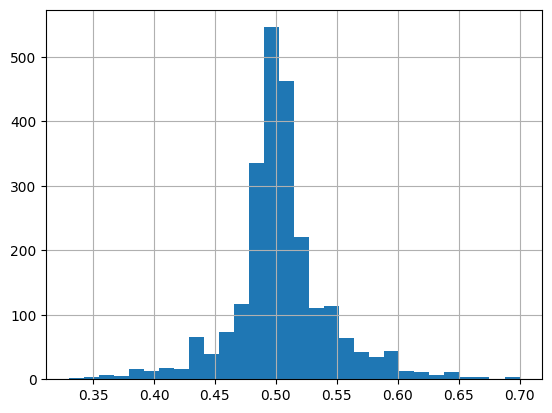

In [13]:
df['bin_accuracy'].hist(bins = 30)

In [14]:
#Compare task accuracy
print_results(df,['task'])

Results for task:
    task      Mean  High   Low  Count
0  class  0.509798   0.7  0.33   1200
1    reg  0.499127   0.6  0.37   1200


In [15]:
#Compare test size for reg and class
print('Regression')
print_results(df_reg,['test_size'])

print('\nClassification')
print_results(df_class,['test_size'])

Regression
Results for test_size:
  test_size      Mean      High       Low  Count
1        5%  0.500753  0.551402  0.444593    600
0       100  0.497500  0.600000  0.370000    600

Classification
Results for test_size:
  test_size      Mean      High       Low  Count
0       100  0.518633  0.700000  0.330000    600
1        5%  0.500963  0.536268  0.452477    600


In [16]:
#Compare model performance for test_size = 100
print('Regression')
print_results(reg_100,['model'])

print('\nClassification')
print_results(class_100,['model'])

Regression
Results for model:
             model      Mean  High   Low  Count
0     lstm_fcn_reg  0.505667  0.59  0.39    150
2  mini_rocket_reg  0.500667  0.60  0.40    150
3          tst_reg  0.497600  0.59  0.37    150
1         lstm_reg  0.486067  0.59  0.37    150

Classification
Results for model:
               model      Mean  High   Low  Count
3          tst_class  0.526467  0.70  0.34    150
0         lstm_class  0.523600  0.70  0.33    150
1     lstm_fcn_class  0.522467  0.67  0.35    150
2  mini_rocket_class  0.502000  0.67  0.35    150


In [17]:
print('Minirocket classification')
print_results(mini_class,['lag_minute','dif_all','index_bin','TI','time_step','buckets'])

Minirocket classification
Results for lag_minute:
   lag_minute      Mean  High   Low  Count
1           5  0.506000  0.59  0.40     20
2          15  0.501652  0.67  0.35    115
0           1  0.499333  0.61  0.40     15
Results for dif_all:
   dif_all      Mean  High   Low  Count
0    False  0.503509  0.66  0.35     57
1     True  0.501075  0.67  0.36     93
Results for index_bin:
   index_bin      Mean  High   Low  Count
1       True  0.504262  0.64  0.36     61
0      False  0.500449  0.67  0.35     89
Results for TI:
      TI      Mean  High   Low  Count
0  False  0.503505  0.66  0.35     97
1   True  0.499245  0.67  0.36     53
Results for time_step:
  time_step    Mean  High   Low  Count
2      5min  0.5226  0.66  0.36     50
1      1min  0.5062  0.67  0.35     50
0     15min  0.4772  0.58  0.36     50
Results for buckets:
  buckets      Mean  High   Low  Count
2      15  0.523023  0.67  0.36     43
1      10  0.500769  0.61  0.38     52
3       3  0.488621  0.64  0.35     29
0 

In [18]:
print(mini_class.head(5)[['model','lag_minute','dif_all','index_bin','TI','bin_accuracy','time_step','buckets']])

                  model  lag_minute  dif_all  index_bin     TI  bin_accuracy  \
1329  mini_rocket_class          15     True      False   True          0.67   
1435  mini_rocket_class          15    False      False  False          0.66   
1332  mini_rocket_class          15     True      False   True          0.66   
1410  mini_rocket_class          15     True       True  False          0.64   
1336  mini_rocket_class          15     True       True   True          0.64   

     time_step buckets  
1329      1min      15  
1435      5min      15  
1332      1min      15  
1410      5min      15  
1336      1min       3  


In [19]:
mini_class_best = mini_class[(mini_class['lag_minute']==15)&
                           (mini_class['dif_all']==True)&
                           (mini_class['index_bin']==False)&
                           (mini_class['TI']==True)&
                           (mini_class['time_step']=='1min')&
                           (mini_class['buckets']=='15')]

print('Mini-rocket best-classification')
#Hahaha den körde aldrig bästa kombon, så tog den som den konvergera till mest ggr
print_results(mini_class_best,['model'])

Mini-rocket best-classification
Results for model:
               model      Mean  High   Low  Count
0  mini_rocket_class  0.526667  0.67  0.37      6


In [20]:
print('Minirocket Regression')
print_results(mini_reg,['lag_minute','dif_all','index_bin','TI','time_step','buckets'])

Minirocket Regression
Results for lag_minute:
   lag_minute      Mean  High   Low  Count
2          15  0.504805  0.60  0.40     77
1           5  0.497647  0.56  0.44     51
0           1  0.493182  0.56  0.41     22
Results for dif_all:
   dif_all      Mean  High   Low  Count
0    False  0.502535  0.60  0.40     71
1     True  0.498987  0.56  0.41     79
Results for index_bin:
   index_bin      Mean  High   Low  Count
1       True  0.501200  0.60  0.40     75
0      False  0.500133  0.56  0.41     75
Results for TI:
      TI      Mean  High   Low  Count
0  False  0.501616  0.60  0.40     99
1   True  0.498824  0.56  0.44     51
Results for time_step:
  time_step    Mean  High   Low  Count
0     15min  0.5044  0.60  0.40     50
2      5min  0.4992  0.56  0.44     50
1      1min  0.4984  0.56  0.41     50
Results for buckets:
  buckets      Mean  High  Low  Count
0    None  0.500667   0.6  0.4    150


In [21]:
print(mini_reg.head(5)[['model','lag_minute','dif_all','index_bin','TI','bin_accuracy','time_step','buckets']])

                model  lag_minute  dif_all  index_bin     TI  bin_accuracy  \
1515  mini_rocket_reg          15    False       True  False          0.60   
1513  mini_rocket_reg          15    False       True  False          0.57   
1539  mini_rocket_reg          15    False       True  False          0.57   
1544  mini_rocket_reg          15    False       True  False          0.57   
1510  mini_rocket_reg          15    False       True  False          0.56   

     time_step buckets  
1515     15min    None  
1513     15min    None  
1539     15min    None  
1544     15min    None  
1510     15min    None  


In [22]:
mini_reg_best = mini_reg[(mini_reg['lag_minute']==15)&
                           (mini_reg['dif_all']==False)&
                           (mini_reg['index_bin']==True)&
                           (mini_reg['TI']==False)&
                           (mini_reg['time_step']=='15min')]

print('Mini-rocket best-regression')
#Hahaha den körde aldrig bästa kombon, så tog den som den konvergera till mest ggr
print_results(mini_reg_best,['model'])

Mini-rocket best-regression
Results for model:
             model      Mean  High  Low  Count
0  mini_rocket_reg  0.503704   0.6  0.4     27


In [23]:
print('TST classification')
print_results(tst_class,['lag_minute','dif_all','index_bin','TI','time_step','buckets'])

TST classification
Results for lag_minute:
   lag_minute      Mean  High   Low  Count
2          15  0.528478  0.70  0.34     92
1           5  0.526596  0.63  0.36     47
0           1  0.509091  0.56  0.43     11
Results for dif_all:
   dif_all      Mean  High   Low  Count
1     True  0.534787  0.70  0.34     94
0    False  0.512500  0.62  0.36     56
Results for index_bin:
   index_bin      Mean  High   Low  Count
0      False  0.532414  0.70  0.34    116
1       True  0.506176  0.59  0.39     34
Results for TI:
      TI      Mean  High   Low  Count
1   True  0.530909  0.70  0.34     88
0  False  0.520161  0.62  0.36     62
Results for time_step:
  time_step    Mean  High   Low  Count
1      1min  0.5452  0.70  0.34     50
2      5min  0.5202  0.62  0.36     50
0     15min  0.5140  0.57  0.41     50
Results for buckets:
  buckets      Mean  High   Low  Count
0       1  0.538704  0.61  0.40     54
1      10  0.536957  0.70  0.34     46
4       5  0.511176  0.57  0.42     17
2      15

In [24]:
print(tst_class.head(5)[['model','lag_minute','dif_all','index_bin','TI','bin_accuracy','time_step','buckets']])

          model  lag_minute  dif_all  index_bin    TI  bin_accuracy time_step  \
1910  tst_class          15     True      False  True          0.70      1min   
1917  tst_class          15     True      False  True          0.70      1min   
1944  tst_class          15     True      False  True          0.69      1min   
1912  tst_class          15     True      False  True          0.67      1min   
1923  tst_class          15     True      False  True          0.64      1min   

     buckets  
1910      10  
1917      10  
1944      10  
1912      10  
1923      10  


In [25]:
tst_class_best = tst_class[(tst_class['lag_minute']==15)&
                           (tst_class['dif_all']==True)&
                           (tst_class['index_bin']==False)&
                           (tst_class['TI']==True)&
                           (tst_class['time_step']=='1min')&
                           (tst_class['buckets']=='10')]

print('TST best-classification')
print_results(tst_class_best,['model'])

TST best-classification
Results for model:
       model      Mean  High   Low  Count
0  tst_class  0.560952   0.7  0.34     21


In [26]:
print('TST regression')
print_results(tst_reg,['lag_minute','dif_all','index_bin','TI','time_step','buckets'])

TST regression
Results for lag_minute:
   lag_minute      Mean  High   Low  Count
0           1  0.508065  0.58  0.43     31
1           5  0.503111  0.58  0.43     45
2          15  0.489865  0.59  0.37     74
Results for dif_all:
   dif_all      Mean  High   Low  Count
0    False  0.498205  0.59  0.39     78
1     True  0.496944  0.58  0.37     72
Results for index_bin:
   index_bin      Mean  High   Low  Count
0      False  0.498864  0.58  0.39     88
1       True  0.495806  0.59  0.37     62
Results for TI:
      TI      Mean  High   Low  Count
0  False  0.501646  0.59  0.41     79
1   True  0.493099  0.58  0.37     71
Results for time_step:
  time_step    Mean  High   Low  Count
1      1min  0.5020  0.58  0.43     50
2      5min  0.4968  0.58  0.39     50
0     15min  0.4940  0.59  0.37     50
Results for buckets:
  buckets    Mean  High   Low  Count
0    None  0.4976  0.59  0.37    150


In [27]:
print(tst_reg.head(5)[['model','lag_minute','dif_all','index_bin','TI','bin_accuracy','time_step','buckets']])

        model  lag_minute  dif_all  index_bin     TI  bin_accuracy time_step  \
2105  tst_reg          15    False       True  False          0.59     15min   
2342  tst_reg          15    False      False  False          0.58      5min   
2228  tst_reg           1     True      False  False          0.58      1min   
2301  tst_reg           5     True      False   True          0.58      5min   
2327  tst_reg           5     True      False   True          0.58      5min   

     buckets  
2105    None  
2342    None  
2228    None  
2301    None  
2327    None  


In [28]:
tst_reg_best = tst_reg[(tst_reg['lag_minute']==15)&
                           (tst_reg['dif_all']==True)&
                           (tst_reg['index_bin']==False)&
                           (tst_reg['TI']==False)&
                           (tst_reg['time_step']=='5min')]

print('TST best-reg')
print_results(tst_reg_best,['model'])

TST best-reg
Results for model:
Empty DataFrame
Columns: [model, Mean, High, Low, Count]
Index: []


In [29]:
print('LSTM_FCN classification')
print_results(lstm_fcn_class,['lag_minute','dif_all','index_bin','TI','time_step','buckets'])

LSTM_FCN classification
Results for lag_minute:
   lag_minute      Mean  High   Low  Count
2          15  0.524190  0.65  0.35    105
1           5  0.521316  0.67  0.40     38
0           1  0.502857  0.53  0.47      7
Results for dif_all:
   dif_all      Mean  High   Low  Count
0    False  0.525167  0.67  0.40     60
1     True  0.520667  0.66  0.35     90
Results for index_bin:
   index_bin      Mean  High   Low  Count
1       True  0.524505  0.66  0.35    111
0      False  0.516667  0.67  0.40     39
Results for TI:
      TI      Mean  High   Low  Count
0  False  0.525930  0.64  0.35     86
1   True  0.517813  0.67  0.35     64
Results for time_step:
  time_step    Mean  High   Low  Count
1      1min  0.5248  0.67  0.40     50
2      5min  0.5244  0.62  0.43     50
0     15min  0.5182  0.62  0.35     50
Results for buckets:
  buckets      Mean  High   Low  Count
3       3  0.528205  0.62  0.40     39
0       1  0.524828  0.66  0.41     29
2      15  0.522143  0.64  0.35     28
1   

In [30]:
print_results(lstm_fcn_class,['lag_minute','dif_all','index_bin','TI','time_step','buckets'])

Results for lag_minute:
   lag_minute      Mean  High   Low  Count
2          15  0.524190  0.65  0.35    105
1           5  0.521316  0.67  0.40     38
0           1  0.502857  0.53  0.47      7
Results for dif_all:
   dif_all      Mean  High   Low  Count
0    False  0.525167  0.67  0.40     60
1     True  0.520667  0.66  0.35     90
Results for index_bin:
   index_bin      Mean  High   Low  Count
1       True  0.524505  0.66  0.35    111
0      False  0.516667  0.67  0.40     39
Results for TI:
      TI      Mean  High   Low  Count
0  False  0.525930  0.64  0.35     86
1   True  0.517813  0.67  0.35     64
Results for time_step:
  time_step    Mean  High   Low  Count
1      1min  0.5248  0.67  0.40     50
2      5min  0.5244  0.62  0.43     50
0     15min  0.5182  0.62  0.35     50
Results for buckets:
  buckets      Mean  High   Low  Count
3       3  0.528205  0.62  0.40     39
0       1  0.524828  0.66  0.41     29
2      15  0.522143  0.64  0.35     28
1      10  0.519600  0.67  0

In [31]:
lstm_fcn_class_best = lstm_fcn_class[(lstm_fcn_class['lag_minute']==5)&
                           (lstm_fcn_class['dif_all']==True)&
                           (lstm_fcn_class['index_bin']==True)&
                           (lstm_fcn_class['TI']==True)&
                           (lstm_fcn_class['time_step']=='1min')&
                           (lstm_fcn_class['buckets']=='5')]

print('lstm_fcn best-classification')
print_results(lstm_fcn_class_best,['model'])

lstm_fcn best-classification
Results for model:
            model  Mean  High   Low  Count
0  lstm_fcn_class  0.45  0.45  0.45      1


In [32]:
print('LSTM_FCN Regression')
print_results(lstm_fcn_reg,['lag_minute','dif_all','index_bin','TI','time_step','buckets'])

LSTM_FCN Regression
Results for lag_minute:
   lag_minute      Mean  High   Low  Count
2          15  0.506762  0.59  0.42    105
0           1  0.504211  0.57  0.39     19
1           5  0.502308  0.57  0.40     26
Results for dif_all:
   dif_all      Mean  High   Low  Count
1     True  0.509254  0.58  0.39     67
0    False  0.502771  0.59  0.40     83
Results for index_bin:
   index_bin    Mean  High   Low  Count
0      False  0.5058  0.59  0.40    100
1       True  0.5054  0.58  0.39     50
Results for TI:
      TI      Mean  High   Low  Count
0  False  0.505714  0.59  0.40     70
1   True  0.505625  0.58  0.39     80
Results for time_step:
  time_step    Mean  High   Low  Count
0     15min  0.5126  0.58  0.43     50
1      1min  0.5094  0.57  0.39     50
2      5min  0.4950  0.59  0.40     50
Results for buckets:
  buckets      Mean  High   Low  Count
0    None  0.505667  0.59  0.39    150


In [33]:
print(lstm_fcn_reg.head(5)[['model','lag_minute','dif_all','index_bin','TI','bin_accuracy','time_step','buckets']])

            model  lag_minute  dif_all  index_bin     TI  bin_accuracy  \
838  lstm_fcn_reg          15    False      False  False          0.59   
627  lstm_fcn_reg          15     True       True   True          0.58   
828  lstm_fcn_reg          15    False      False  False          0.58   
646  lstm_fcn_reg          15    False      False   True          0.58   
717  lstm_fcn_reg           1    False      False   True          0.57   

    time_step buckets  
838      5min    None  
627     15min    None  
828      5min    None  
646     15min    None  
717      1min    None  


In [34]:
lstm_fcn_reg_best = lstm_fcn_reg[(lstm_fcn_reg['lag_minute']==15)&
                           (lstm_fcn_reg['dif_all']==False)&
                           (lstm_fcn_reg['index_bin']==False)&
                           (lstm_fcn_reg['TI']==True)&
                           (lstm_fcn_reg['time_step']=='15min')]

print('lstm_fcn best-reg')
print_results(lstm_fcn_reg_best,['model'])

lstm_fcn best-reg
Results for model:
          model   Mean  High   Low  Count
0  lstm_fcn_reg  0.536  0.58  0.46      5


In [35]:
print('LSTM classification')
print_results(lstm_class,['lag_minute','dif_all','index_bin','TI','time_step','buckets'])

LSTM classification
Results for lag_minute:
   lag_minute      Mean  High   Low  Count
1           5  0.549836  0.70  0.41     61
0           1  0.517000  0.61  0.42     10
2          15  0.504177  0.65  0.33     79
Results for dif_all:
   dif_all      Mean  High   Low  Count
0    False  0.533853  0.70  0.36    109
1     True  0.496341  0.65  0.33     41
Results for index_bin:
   index_bin      Mean  High   Low  Count
0      False  0.533814  0.70  0.39     97
1       True  0.504906  0.63  0.33     53
Results for TI:
      TI      Mean  High   Low  Count
1   True  0.535455  0.70  0.33     88
0  False  0.506774  0.63  0.36     62
Results for time_step:
  time_step    Mean  High   Low  Count
2      5min  0.5510  0.70  0.42     50
1      1min  0.5124  0.65  0.33     50
0     15min  0.5074  0.63  0.39     50
Results for buckets:
  buckets      Mean  High   Low  Count
3       3  0.544615  0.70  0.36     52
0       1  0.526512  0.65  0.39     43
2      15  0.515263  0.61  0.39     19
4       

In [36]:
print(lstm_class.head(5)[['model','lag_minute','dif_all','index_bin','TI','bin_accuracy','time_step','buckets']])

          model  lag_minute  dif_all  index_bin     TI  bin_accuracy  \
209  lstm_class           5    False      False   True          0.70   
138  lstm_class          15     True      False   True          0.65   
116  lstm_class           5    False       True   True          0.63   
227  lstm_class           5    False      False   True          0.63   
145  lstm_class          15     True      False  False          0.63   

    time_step buckets  
209      5min       3  
138      1min       1  
116      1min       5  
227      5min       3  
145      1min       1  


In [37]:
lstm_class_best = lstm_class[(lstm_class['lag_minute']==5)&
                           (lstm_class['dif_all']==False)&
                           (lstm_class['index_bin']==False)&
                           (lstm_class['TI']==True)&
                           (lstm_class['time_step']=='5min')&
                           (lstm_class['buckets']=='3')]

print('lstm best-classification')
print_results(lstm_class_best,['model'])

lstm best-classification
Results for model:
        model      Mean  High  Low  Count
0  lstm_class  0.592609   0.7  0.5     23


In [38]:
print('LSTM reg')
print_results(lstm_reg,['lag_minute','dif_all','index_bin','TI','time_step','buckets'])

LSTM reg
Results for lag_minute:
   lag_minute      Mean  High   Low  Count
0           1  0.489615  0.53  0.45     26
2          15  0.488235  0.58  0.37    102
1           5  0.471818  0.59  0.41     22
Results for dif_all:
   dif_all      Mean  High   Low  Count
0    False  0.491961  0.57  0.42     51
1     True  0.483030  0.59  0.37     99
Results for index_bin:
   index_bin      Mean  High   Low  Count
0      False  0.495484  0.58  0.41     62
1       True  0.479432  0.59  0.37     88
Results for TI:
      TI      Mean  High   Low  Count
0  False  0.494571  0.57  0.42     70
1   True  0.478625  0.59  0.37     80
Results for time_step:
  time_step    Mean  High   Low  Count
0     15min  0.5076  0.58  0.42     50
1      1min  0.4898  0.54  0.44     50
2      5min  0.4608  0.59  0.37     50
Results for buckets:
  buckets      Mean  High   Low  Count
0    None  0.486067  0.59  0.37    150


In [39]:
print(lstm_reg.head(5)[['model','lag_minute','dif_all','index_bin','TI','bin_accuracy','time_step','buckets']])

         model  lag_minute  dif_all  index_bin     TI  bin_accuracy time_step  \
1110  lstm_reg           5     True       True   True          0.59      5min   
936   lstm_reg          15     True      False   True          0.58     15min   
917   lstm_reg          15     True      False  False          0.57     15min   
942   lstm_reg          15    False       True   True          0.57     15min   
938   lstm_reg          15    False       True   True          0.56     15min   

     buckets  
1110    None  
936     None  
917     None  
942     None  
938     None  


In [40]:
lstm_reg_best = lstm_reg[(lstm_reg['lag_minute']==15)&
                           (lstm_reg['dif_all']==True)&
                           (lstm_reg['index_bin']==True)&
                           (lstm_reg['TI']==True)&
                           (lstm_reg['time_step']=='15min')]

print('lstm best-reg')
print_results(lstm_reg_best,['model'])

lstm best-reg
Results for model:
      model  Mean  High   Low  Count
0  lstm_reg  0.42  0.42  0.42      1


In [ ]:
#Ej använt

test_path = 'Optimizer\data_optimization\All_results'
keywords = ['class','_5min']

def concat_dataframes_with_keywords(folder_path, *keywords):
    """
    Concatenates all dataframes in csv files whose names contain all of the specified keywords,
    and returns a single dataframe.
    """
    dfs = []
    for filename in os.listdir(folder_path):
        if filename.endswith('.csv') and all(keyword in filename.lower() for keyword in keywords):
            filepath = os.path.join(folder_path, filename)
            df = pd.read_csv(filepath)
            dfs.append(df)
    concatenated_df = pd.concat(dfs, ignore_index=True)
    return concatenated_df

test_df = concat_dataframes_with_keywords(test_path,*keywords)

